# Simulation for random packing of circles

In [3]:
import numpy as np

In [4]:
# Here we just compute the feasible points
from numpy.random import choice
from numpy import logical_and, logical_or, arange, arcsin, pi, array
M=101
def circles(r=1.0, M=101):
    # generate random circle packing
    gamma=arcsin(r/(1+r))/pi
    feasible  = arange(M)
    # first circle
    XV = [0]     #  XV = vector of point indices
    FV = [M-1]   #  FV = vector of count of feasible points
    feasible = feasible[logical_and(feasible >= gamma*(M-1),feasible <= (1-gamma)*(M-1))]
    FV.append(len(feasible))
    # other circles
    while True:
        if len(feasible) == 0: break  # stop when no more feasible points
        X = choice(feasible)  # select random element of feasible set
        XV.append(X)
        feasible = feasible[logical_or(feasible<=X-gamma*(M-1), feasible>=X+gamma*(M-1))] # up
        FV.append(len(feasible))
    return array(XV), array(FV)
r = 0.4
XV, FV = circles(r)
print(XV/(M-1.0))
print(FV)

[0.   0.85 0.73 0.38 0.23 0.5  0.13 0.63]
[100  81  66  54  35  20   8   4   0]


**Plotting the circles**

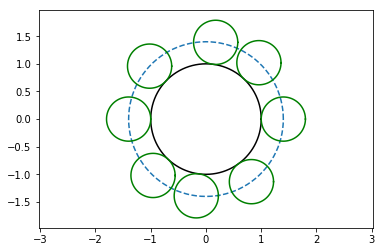

In [5]:
# plot the circles
from pylab import plot, axis, show
from numpy.random import choice
from numpy import sin, cos, pi
%matplotlib inline
theta = np.linspace(0,2*pi, M)
def drawcircle(cx, cy, clr, r=1.0):
    # draw a circle with color clr, radius r and centre (cx, cy)
    plot(cx+r*cos(theta), cy+r*sin(theta), clr)
# draw inner circle
drawcircle(0,0,'black')
axis('square'); axis([-(1+2*r), 1+2*r, -(1+2*r), 1+2*r])
plot((1+r)*cos(theta),(1+r)*sin(theta),'--')
axis('equal')
for X in XV:
    B = 2*pi*X/(M-1)
    drawcircle((1+r)*cos(B),(1+r)*sin(B), 'green', r)
show();

**Distribution of numbers of feasible points**

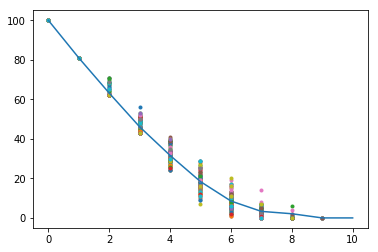

In [6]:
# multiple simulations
from numpy import zeros
r = 0.4
gamma=arcsin(r/(1+r))/pi
N = int(round(1/gamma))
n = 100
FS = zeros(N)
FC = zeros(N)
for i in range(n):
    _, FV = circles(r)
    FS[:len(FV[:-1])] += FV[:-1]
    FC[:len(FV[:-1])] += 1
    plot(FV,'.')
FM = FS/(FC+1e-9)  # mean
plot(FM)